# Probability and Statistics Programming

## Project Title: Demonstrate the Central Limit Theorem

### Objective: Reflecting the knowledge of sampling distribution

#### Tasks Recommended:
- A gray-scale image is a two-dimensional array of numbers, each of which represents the corresponding pixel intensity. You can obtain this array of numbers (i.e. image read) using various python packages.
- Consider the supplied "lena_gray.gif" gray-scale image as the population. Based on the population, you need to implement the following tasks

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp
from skimage import io

image = io.imread(fname='lena_gray.gif')

#### TASK1
-  Find out the population size 𝑛, population mean (𝜇), population variance (𝜎^2), population range, minimum number, maximum number, population mode, and population median.

In [4]:
p_size = image.shape[0]
print("population size : %d * %d = %d" %(p_size, p_size, p_size*p_size))

print("population mean :", np.mean(image))

print("population variance :", np.var(image))

p_min = np.min(image)
print("minimum number :", p_min)

p_max = np.max(image)
print("maximum number :", p_max)
print("population range : %d ~ %d" %(p_min, p_max))

p_mode = sp.mode(image)
print("population mode :", p_mode[0][0][0])

print("population median :", np.median(image))

population size : 512 * 512 = 262144
population mean : 124.05046081542969
population variance : 2289.9760151074734
minimum number : 25
maximum number : 245
population range : 25 ~ 245
population mode : 99
population median : 129.0


#### TASK2
- Find out the histogram of the population. Comment on the population distribution.

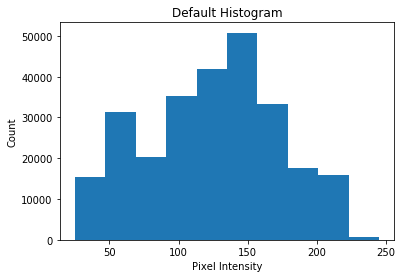

In [14]:
re_img = image.reshape(-1)
re_img = np.sort(re_img)

plt.title("Default Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Count")
plt.hist(re_img)
plt.show()

#### TASK3
- Investigate the histogram by changing the number of bins to 10, 100, and 1,000. Provide your observations.

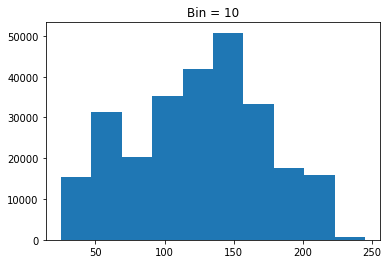

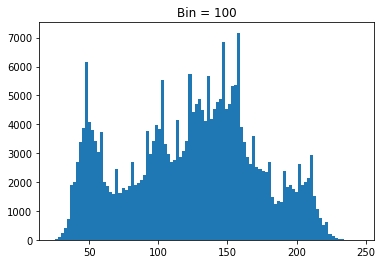

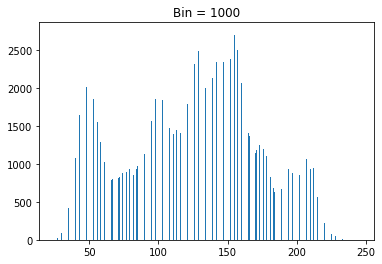

In [22]:
plt.title("Bin = 10")
plt.hist(re_img, bins=10)
plt.show()

plt.title("Bin = 100")
plt.hist(re_img, bins=100)
plt.show()

plt.title("Bin = 1000")
plt.hist(re_img, bins=1000)
plt.show()

#### TASK4
- Demonstrate the central limit theorem (i.e., the distribution of the sampling mean will approach towards the normal distribution with the mean 𝜇 and variance 𝜎^2/𝑛 as the sample size increases). Recommended sample sizes are 5, 10, 20, 30, 50, 100. In addition to any content that you think appropriate for this demonstration, you will include various graphical representations such as the respective histogram for each sample size.

In [23]:
# sample size = 30

np.random.rand(30) * (512*512)

In [24]:
# sample size = 50

In [ ]:
# sample size = 100